# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## Load data

In [2]:
df_2023= pd.read_csv("C:/Users/ahria/Downloads/Export(2).csv")
df_2017 = pd.read_csv("C:/Users/ahria/Downloads/Export(1).csv")
df_2015 = pd.read_csv("C:/Users/ahria/Downloads/Export.csv")

df_2020= pd.read_csv('https://raw.githubusercontent.com/sgolden3/Project-One-Data-5100/main/Data/2020.csv')
df_2021= pd.read_csv('https://raw.githubusercontent.com/sgolden3/Project-One-Data-5100/main/Data/2021.csv')
df_2022= pd.read_csv('https://raw.githubusercontent.com/sgolden3/Project-One-Data-5100/main/Data/2022.csv')

## Scatter and histo

### 2015

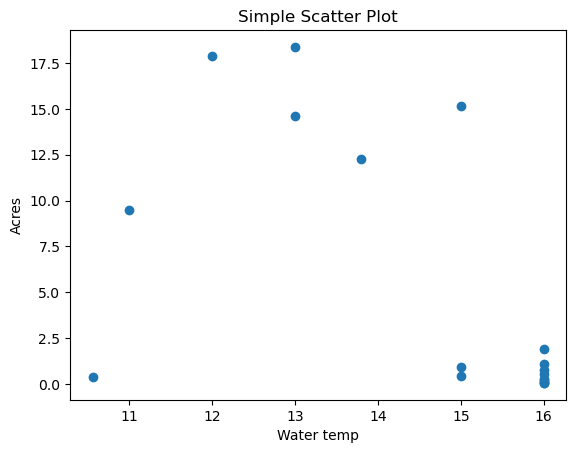

In [3]:
plt.scatter(df_2015['Water Temp (C)'], df_2015['Acres'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

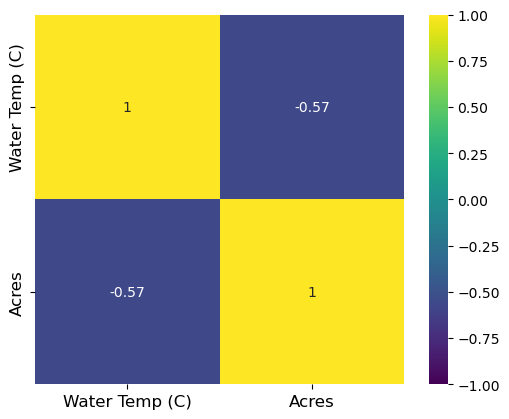

In [4]:
predictor_variables = ['Water Temp (C)']

numerical_predictors = df_2015[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_2015[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2017

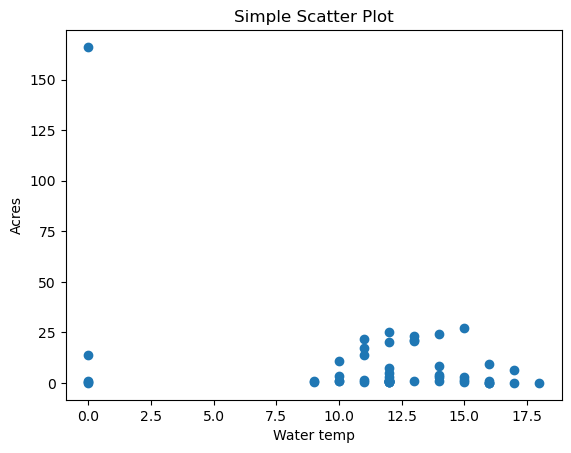

In [5]:
plt.scatter(df_2017['Water Temp (C )'], df_2017['Acres'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

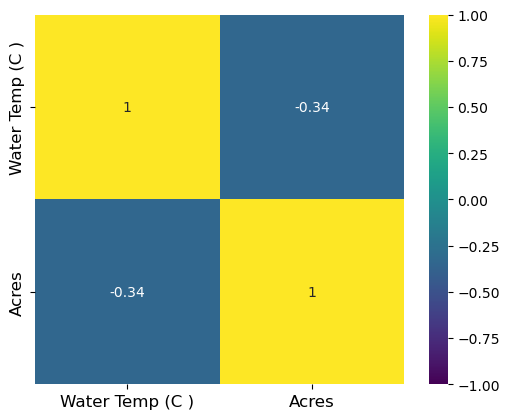

In [6]:
predictor_variables = ['Water Temp (C )']

numerical_predictors = df_2017[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_2017[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2020

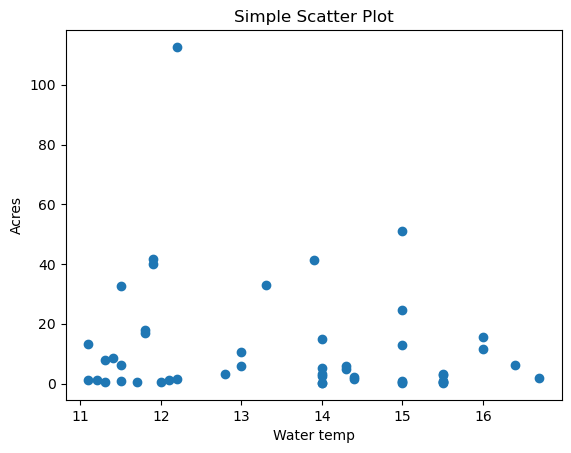

In [7]:
plt.scatter(df_2020['Water Temp (C ) 1'], df_2020['Acres'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

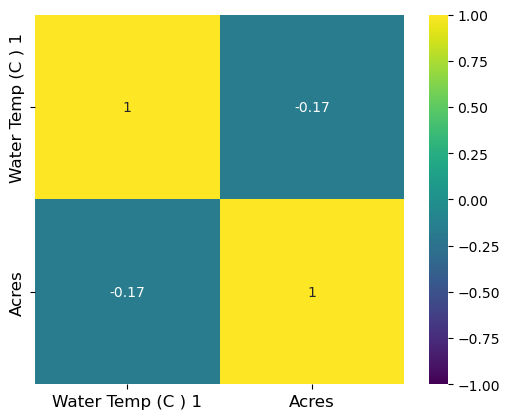

In [8]:
predictor_variables = ['Water Temp (C ) 1']

numerical_predictors = df_2020[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_2020[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2021

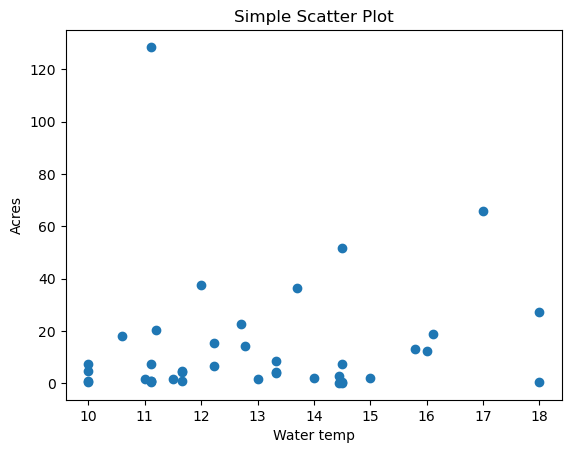

In [9]:
plt.scatter(df_2021['Water Temp (C ) Water Edge 1'], df_2021['Acres'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

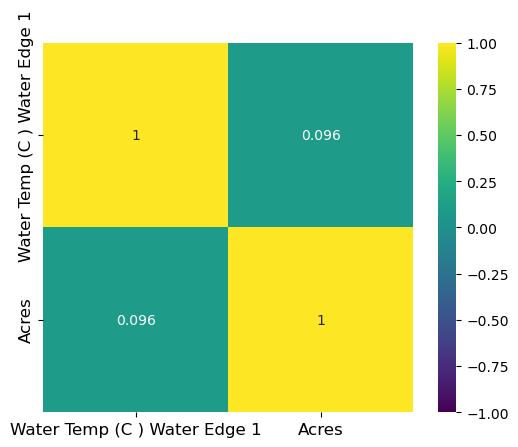

In [10]:
predictor_variables = ['Water Temp (C ) Water Edge 1']

numerical_predictors = df_2021[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_2021[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2022

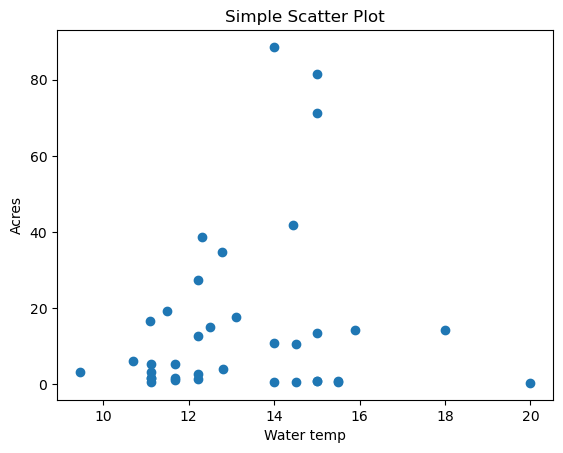

In [11]:
plt.scatter(df_2022['Water Temp (C ) Water Edge 1'], df_2022['Acres'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

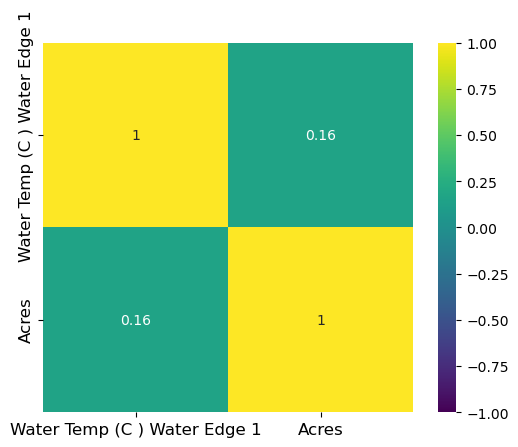

In [12]:
predictor_variables = ['Water Temp (C ) Water Edge 1']

numerical_predictors = df_2022[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_2022[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2023

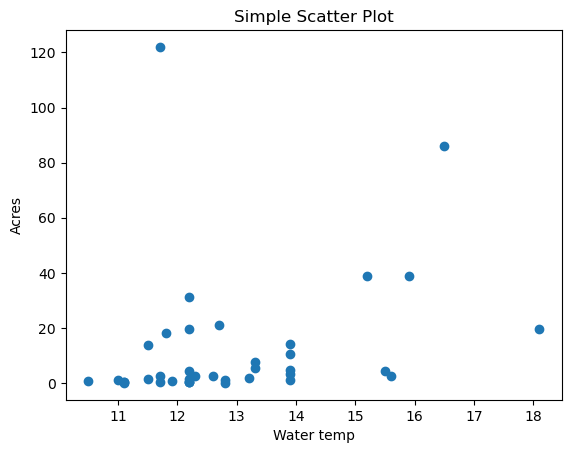

In [13]:
plt.scatter(df_2023['Water Temp (C ) Water Edge 1'], df_2023['Acres'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

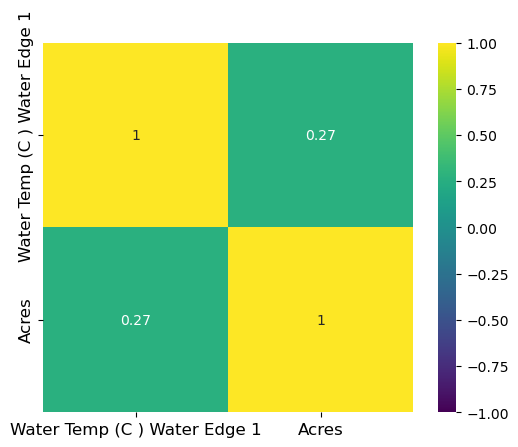

In [14]:
predictor_variables = ['Water Temp (C ) Water Edge 1']

numerical_predictors = df_2023[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_2023[numerical_predictors + ["Acres"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

## Explore/clean

### convert to datetime

In [15]:
df_2015['Survey Date'] = pd.to_datetime(df_2015['Survey Date'], format ='mixed')
df_2017['Survey Date'] = pd.to_datetime(df_2017['Survey Date'], format='mixed')
df_2023['Survey Date'] = pd.to_datetime(df_2023['Survey Date'], format='mixed')

df_2020['Survey Date'] = pd.to_datetime(df_2020['Survey Date'], format ='mixed')
df_2021['Survey Date'] = pd.to_datetime(df_2021['Survey Date'], format='mixed')
df_2022['Survey Date'] = pd.to_datetime(df_2022['Survey Date'], format='mixed')

In [16]:
df_2015['year']= df_2015['Survey Date'].dt.year
df_2017['year'] = df_2017['Survey Date'].dt.year
df_2023['year'] = df_2023['Survey Date'].dt.year

df_2020['year']= df_2020['Survey Date'].dt.year
df_2021['year'] = df_2021['Survey Date'].dt.year
df_2022['year'] = df_2022['Survey Date'].dt.year

In [17]:
df_2015['month'] = df_2015['Survey Date'].dt.month
df_2017['month'] = df_2017['Survey Date'].dt.month
df_2023['month'] = df_2023['Survey Date'].dt.month

df_2020['month'] = df_2020['Survey Date'].dt.month
df_2021['month'] = df_2021['Survey Date'].dt.month
df_2022['month'] = df_2022['Survey Date'].dt.month

### rename columns

In [18]:
df_2015 = df_2015.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres_15",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C)': "water_temp_15",
    }
)

In [19]:
df_2017 = df_2017.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres_17",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C )': "water_temp_17",
    }
)

In [20]:
df_2020 = df_2020.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres_20",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C ) 1': "water_temp_20",
    }
)

In [21]:
df_2021 = df_2021.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres_21",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C ) Water Edge 1': "water_temp_21",
    }
)

In [22]:
df_2022 = df_2022.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres_22",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C ) Water Edge 1': "water_temp_22",
    }
)

In [23]:
df_2023 = df_2023.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres_23",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        "Water Temp (C ) Shore Edge 1": "water_temp_23",
    }
)

### reduce dfs

In [43]:
df15= df_2015[['geometry','bed_name', 'date', 'acres_15', 'county', 'Location',
        'observations', 'water_temp_15','year', 'month']]

In [44]:
df17= df_2017[['geometry','bed_name', 'date', 'acres_17', 'county', 'Location',
        'observations', 'water_temp_17','year', 'month']]

In [45]:
df20= df_2020[['geometry','bed_name', 'date', 'acres_20', 'county', 'Location',
        'observations', 'water_temp_20','year', 'month']]

In [46]:
df21= df_2021[['geometry','bed_name', 'date', 'acres_21', 'county', 'Location',
        'observations', 'water_temp_21','year', 'month']]

In [47]:
df22= df_2022[['geometry','bed_name', 'date', 'acres_22', 'county', 'Location',
        'observations', 'water_temp_22','year', 'month']]

In [48]:
df23 = df_2023[['geometry','bed_name', 'date', 'acres_23', 'county', 'Location',
        'observations', 'Notes', 'water_temp_23','year', 'month']]

### find which ones they all share

In [169]:
#print(df15['bed_name'].unique())
print(df20['bed_name'].unique())
print(df21['bed_name'].unique())

['North Beach East' 'Biz Point' "Ebey's Landing" 'Edmonds 1' 'Edmonds 2'
 'Edmonds 3' 'Hat Island' 'Polnell Point' 'Shannon Point West'
 'Shannon Point East' 'Possession Point' 'Coffin Rocks'
 'Camano Is. SP-Lowell' 'Aiston Preserve' 'Lummi SW' 'Freshwater Bay 2'
 'Clallam Bay' 'Freshwater Bay 1' 'Cherry Point-Gulf Rd' 'Point Whitehorn'
 'Alden Bank']
["Ebey's Landing" 'Edmonds 2' 'Edmonds 3' 'Edmonds 1' 'North Beach East'
 'Biz Point' 'Coffin Rocks' 'Shannon Point West' 'Shannon Point East'
 'Freshwater Bay 1' 'Freshwater Bay 2' 'Clallam Bay' 'Possession Point'
 'Lowell Point' 'Polnell Point' 'Hat Island' 'Lummi SW' 'Point Whitehorn'
 'Cherry Point-Gulf Rd' 'Aiston Preserve' 'Hoypus Point']


In [166]:
set1 = set(df15['bed_name'])
set2 = set(df17['bed_name'])
set3 = set(df20['bed_name'])
set4 = set(df21['bed_name'])
set5 = set(df22['bed_name'])
set6 = set(df23['bed_name'])

#  which do they have in common
list_of_sets = [set1,set2, set3, set4, set5, set6]
result_set = list_of_sets[0].intersection(*list_of_sets[1:])
print(result_set)

{"Ebey's Landing", 'North Beach East'}


In [170]:
df17[df17['bed_name'] == 'North Beach East']

,geometry,bed_name,date,acres_17,county,Location,observations,water_temp_17,year,month
51,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-07-22,17.121355,Jefferson,North Beach Main,"heron on kelp mat, kelp crabs on kelp on nears...",11.0,2017,7
52,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-06-24,10.865711,Jefferson,North Beach Main,We saw kelp at different stages of maturity; s...,10.0,2017,6
61,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-09-04,16.558031,Jefferson,North Beach Main,NaN,NaN,2017,9


## North beach

In [171]:
nb15 = df15[df15['bed_name'] == 'North Beach East']
nb17 = df17[df17['bed_name'] == 'North Beach East']
nb20 = df20[df20['bed_name'] == 'North Beach East']
#nb20 = ebey20.drop_duplicates(subset=['date', 'water_temp_20', 'month'])
nb21 = df21[df21['bed_name'] == 'North Beach Eastg']
nb22 = df22[df22['bed_name'] == 'North Beach East']
nb23 = df23[df23['bed_name'] == 'North Beach East']

In [187]:
nb15

,geometry,bed_name,date,acres_15,county,Location,observations,water_temp_15,year,month
15,Geocortex.Gis.Geometries.Polygon,North Beach East,2015-09-12,2.422843,Jefferson,North Beach Main,NaN,NaN,2015,9


In [188]:
nb21

,geometry,bed_name,date,acres_21,county,Location,observations,water_temp_21,year,month


### 2017

In [174]:
nb17

,geometry,bed_name,date,acres_17,county,Location,observations,water_temp_17,year,month
51,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-07-22,17.121355,Jefferson,North Beach Main,"heron on kelp mat, kelp crabs on kelp on nears...",11.0,2017,7
52,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-06-24,10.865711,Jefferson,North Beach Main,We saw kelp at different stages of maturity; s...,10.0,2017,6
61,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-09-04,16.558031,Jefferson,North Beach Main,NaN,NaN,2017,9


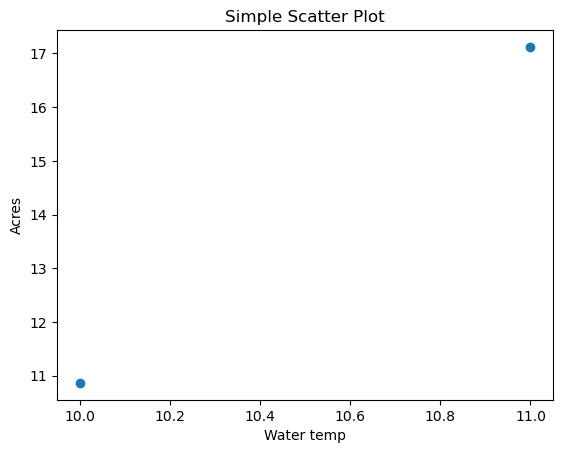

In [175]:
plt.scatter(nb17['water_temp_17'], nb17['acres_17'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

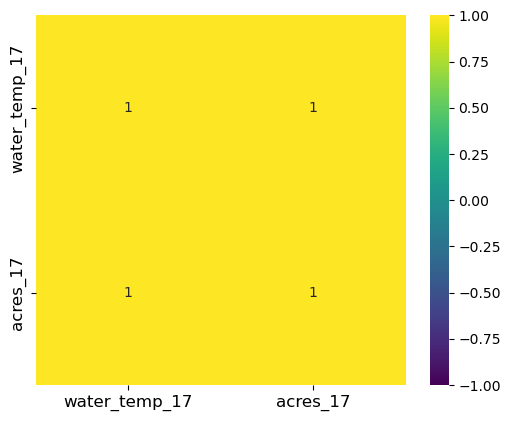

In [176]:
predictor_variables = ['water_temp_17']

numerical_predictors = nb17[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb17[numerical_predictors + ["acres_17"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2020

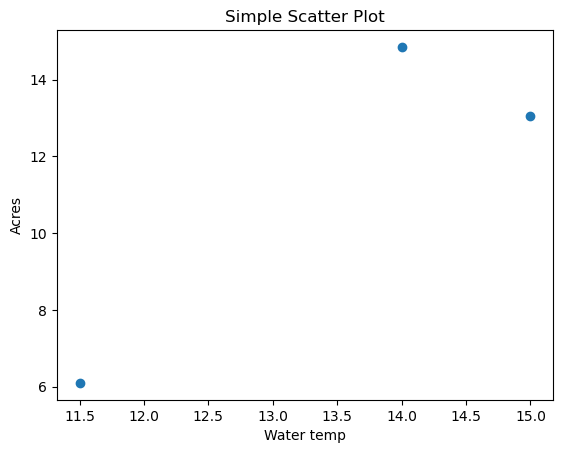

In [178]:
plt.scatter(nb20['water_temp_20'], nb20['acres_20'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

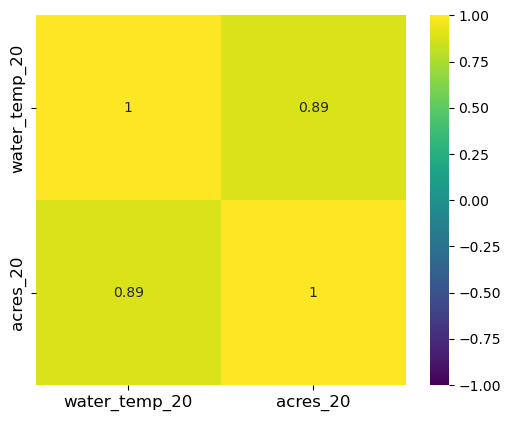

In [179]:
predictor_variables = ['water_temp_20']

numerical_predictors = nb20[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb20[numerical_predictors + ["acres_20"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2022

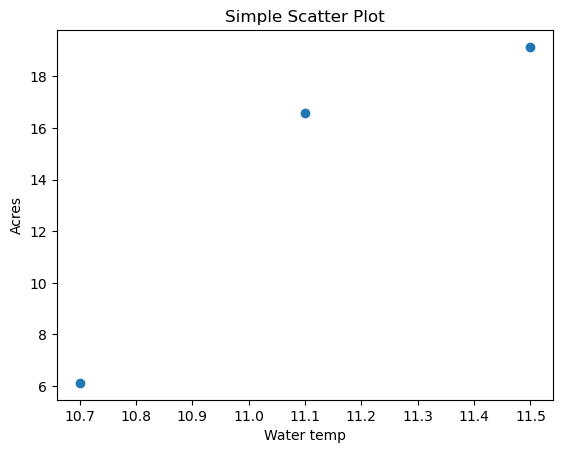

In [182]:
plt.scatter(nb22['water_temp_22'], nb22['acres_22'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

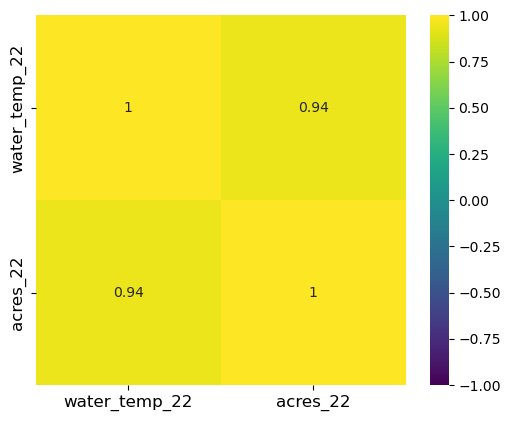

In [183]:
predictor_variables = ['water_temp_22']

numerical_predictors = nb22[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb22[numerical_predictors + ["acres_22"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2023

In [184]:
nb23

,geometry,bed_name,date,acres_23,county,Location,observations,Notes,water_temp_23,year,month
15,Geocortex.Gis.Geometries.Polygon,North Beach East,2023-08-12,18.188146,Jefferson,North Beach Main,STRONG currents - measurements may not match G...,NaN,11.8,2023,8
16,Geocortex.Gis.Geometries.Polygon,North Beach East,2023-07-15,13.823246,Jefferson,North Beach Main,Other species present: eelgrass interspersed a...,NaN,7.6,2023,7


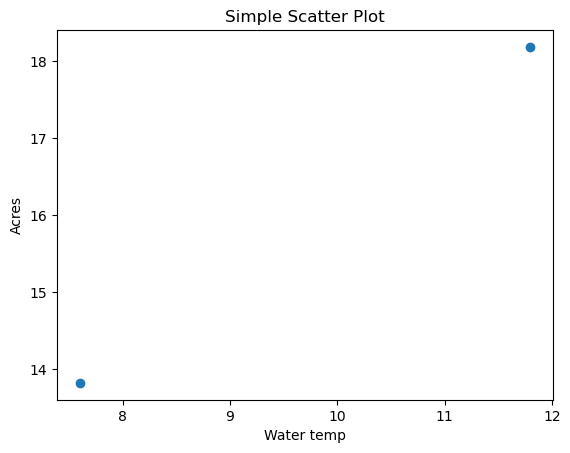

In [185]:
plt.scatter(nb23['water_temp_23'], nb23['acres_23'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

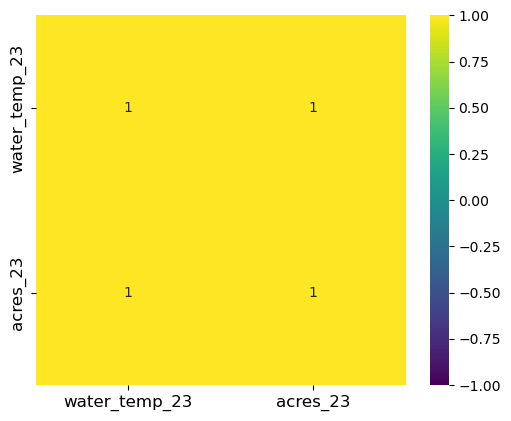

In [186]:
predictor_variables = ['water_temp_23']

numerical_predictors = nb23[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb23[numerical_predictors + ["acres_23"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

## looking at just ebey 

In [102]:
ebey15 = df15[df15['bed_name'] == 'Ebey\'s Landing']
ebey17 = df17[df17['bed_name'] == 'Ebey\'s Landing']
ebey20 = df20[df20['bed_name'] == 'Ebey\'s Landing']
ebey20 = ebey20.drop_duplicates(subset=['date', 'water_temp_20', 'month'])
ebey21 = df21[df21['bed_name'] == 'Ebey\'s Landing']
ebey22 = df22[df22['bed_name'] == 'Ebey\'s Landing']
ebey23 = df23[df23['bed_name'] == 'Ebey\'s Landing']

In [103]:
ebey20

,geometry,bed_name,date,acres_20,county,Location,observations,water_temp_20,year,month
6,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-06-18,17.912362,Island,Ebey's Landing,Many tiny jumping fish\nFew schools of tiny (<...,11.8,2020,6
8,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-07-18,32.672965,Island,Ebey's Landing,NaN,11.5,2020,7
9,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-08-30,39.992646,Island,Ebey's Landing,NaN,11.9,2020,8


## cleaned scatter and histo

### 2015

In [106]:
ebey15

,geometry,bed_name,date,acres_15,county,Location,observations,water_temp_15,year,month
22,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-06-14,9.490779,Island,Ebeys Landing,1) Lots (10^6) of probably kelp crab zoea in ...,11.0,2015,6
23,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-07-19,14.625756,Island,Ebeys Landing,NaN,13.0,2015,7
24,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-08-15,18.371846,Island,Ebeys Landing,NaN,13.0,2015,8
25,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-09-26,17.885763,Island,Ebeys Landing,"Lots of heer,ams gulls, glavcous winged gulls,...",12.0,2015,9


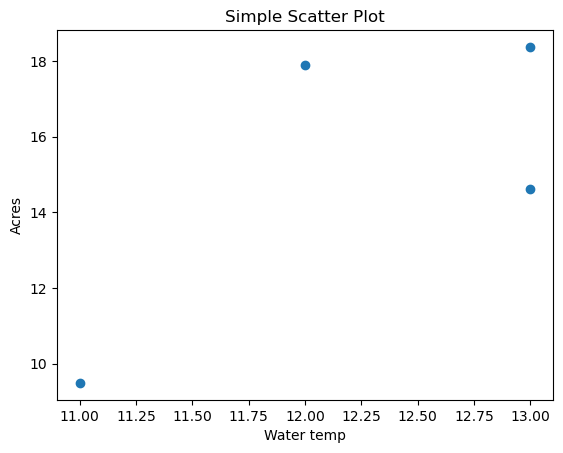

In [130]:
plt.scatter(ebey15['water_temp_15'], ebey15['acres_15'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

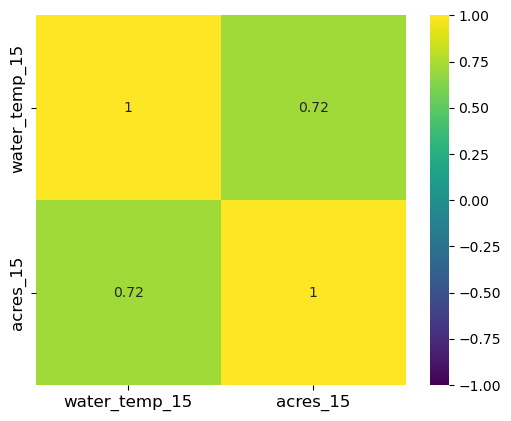

In [107]:
predictor_variables = ['water_temp_15']

numerical_predictors = ebey15[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey15[numerical_predictors + ["acres_15"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2017

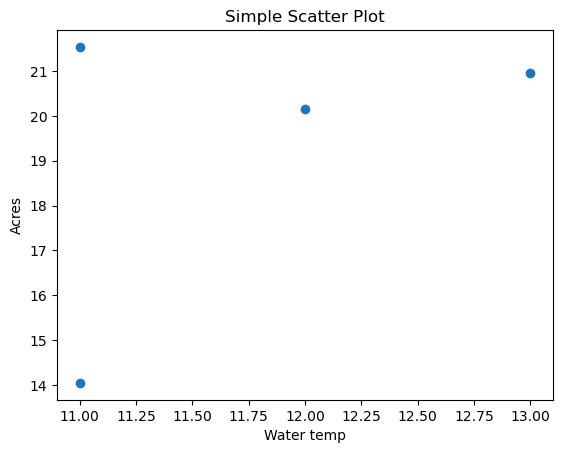

In [132]:
plt.scatter(ebey17['water_temp_17'], ebey17['acres_17'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

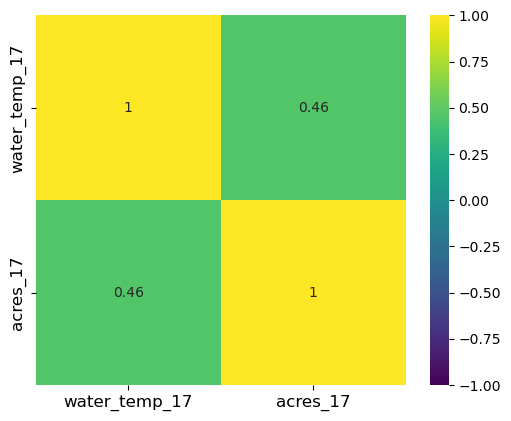

In [133]:
predictor_variables = ['water_temp_17']

numerical_predictors = ebey17[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey17[numerical_predictors + ["acres_17"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2020

In [147]:
ebey20

,geometry,bed_name,date,acres_20,county,Location,observations,water_temp_20,year,month
6,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-06-18,17.912362,Island,Ebey's Landing,Many tiny jumping fish\nFew schools of tiny (<...,11.8,2020,6
8,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-07-18,32.672965,Island,Ebey's Landing,NaN,11.5,2020,7
9,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-08-30,39.992646,Island,Ebey's Landing,NaN,11.9,2020,8


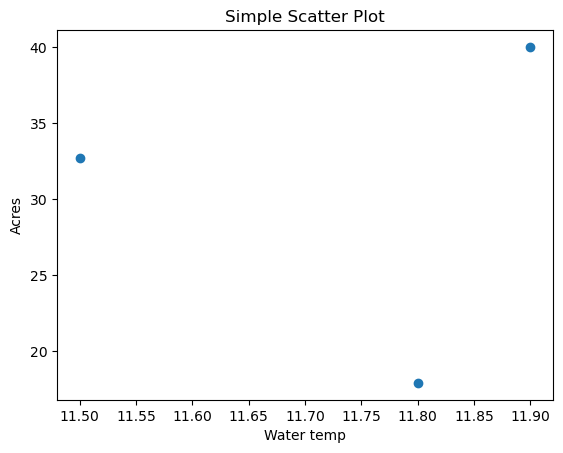

In [134]:
plt.scatter(ebey20['water_temp_20'], ebey20['acres_20'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

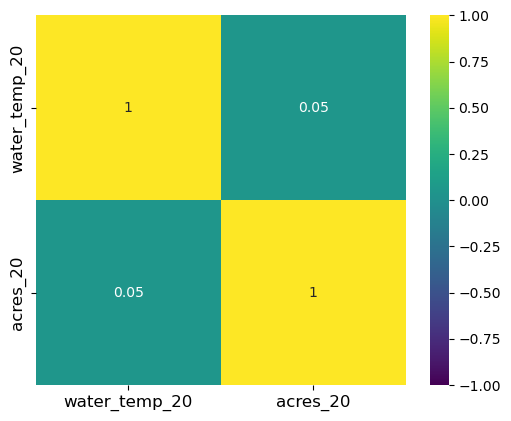

In [135]:
predictor_variables = ['water_temp_20']

numerical_predictors = ebey20[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey20[numerical_predictors + ["acres_20"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2021

In [148]:
ebey21

,geometry,bed_name,date,acres_21,county,Location,observations,water_temp_21,year,month
0,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2021-08-10,37.686544,Island,Ebey's Landing,"1. Numerous herring schools throughout bed, r...",12.0,2021,8


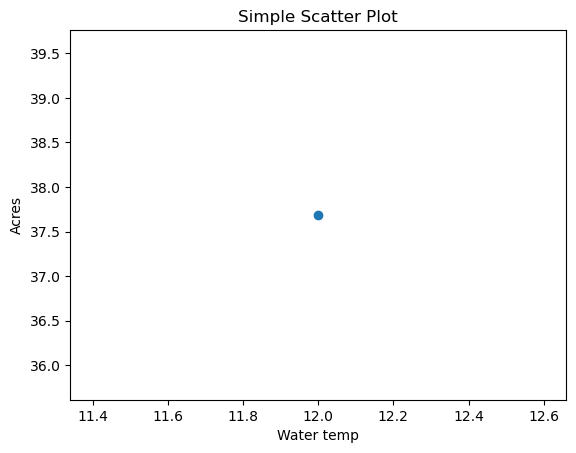

In [136]:
plt.scatter(ebey21['water_temp_21'], ebey21['acres_21'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

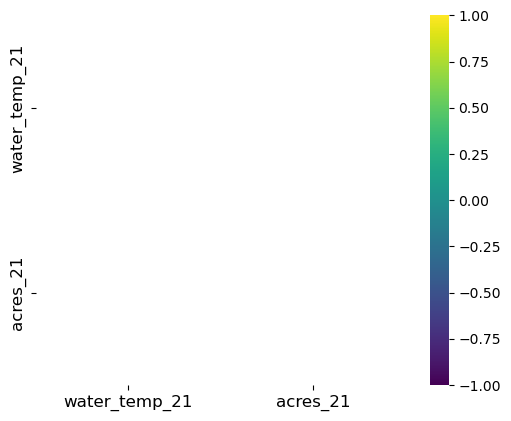

In [137]:
predictor_variables = ['water_temp_21']

numerical_predictors = ebey21[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey21[numerical_predictors + ["acres_21"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2022

In [114]:
ebey22

,geometry,bed_name,date,acres_22,county,Location,observations,water_temp_22,year,month
2,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2022-08-23,38.630701,Island,Ebey's Landing,> 100 gulls (including Heerman's gulls) in fee...,12.3,2022,8


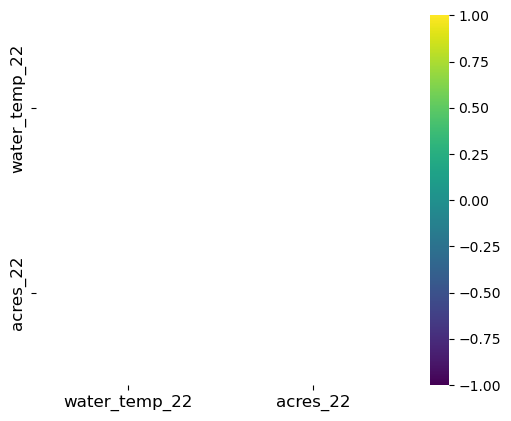

In [115]:
predictor_variables = ['water_temp_22']

numerical_predictors = ebey22[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey22[numerical_predictors + ["acres_22"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2023

In [116]:
ebey23

,geometry,bed_name,date,acres_23,county,Location,observations,Notes,water_temp_23,year,month
4,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2023-08-14,31.122627,Island,Ebey's Landing,Sori abundant (bulbs & blades look good & at v...,NaN,11.8,2023,8


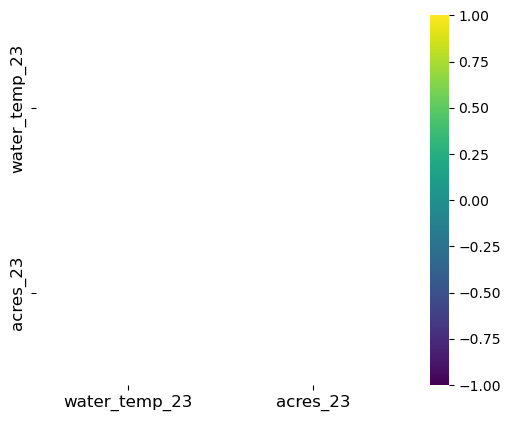

In [117]:
predictor_variables = ['water_temp_23']

numerical_predictors = ebey23[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey23[numerical_predictors + ["acres_23"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### add in column for 2015 water temp and look at correlation between temp two years before

In [138]:
water15= ebey15[['month','water_temp_15']]

In [189]:
water20= ebey20[['month','water_temp_20']]

In [190]:
water21= ebey21[['month','water_temp_21']]

In [196]:
merged_20_22 = pd.merge(ebey22, water20, on='month', how='outer')
merged_20_22

,geometry,bed_name,date,acres_22,county,Location,observations,water_temp_22,year,month,water_temp_20
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,6,11.8
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,7,11.5
2,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2022-08-23,38.630701,Island,Ebey's Landing,> 100 gulls (including Heerman's gulls) in fee...,12.3,2022.0,8,11.9


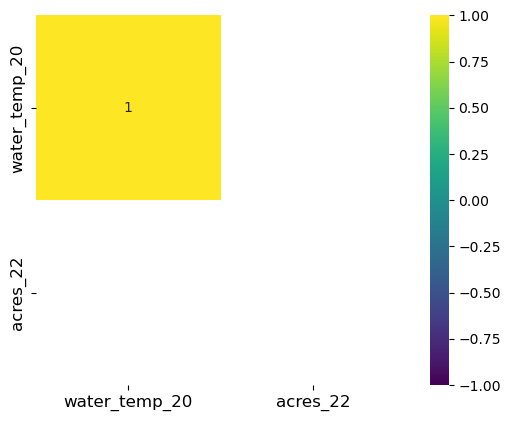

In [199]:
predictor_variables = ['water_temp_20']

numerical_predictors = merged_20_22[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = merged_20_22[numerical_predictors + ["acres_22"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

### 2015 temps affect on 2017 acres

In [200]:
#new_values = [True, False, True]
merged_inner = pd.merge(ebey17, water15, on='month', how='inner')

In [201]:
merged_inner

,geometry,bed_name,date,acres_17,county,Location,observations,water_temp_17,year,month,water_temp_15
0,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-09-16,21.537306,Island,Ebey's Landing,1 sea lion cruising outer perimeter of bed 1 W...,11.0,2017,9,12.0
1,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-08-23,20.948499,Island,Ebey's Landing,"three great blue herons on kelp fishing, six h...",13.0,2017,8,13.0
2,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-07-25,20.160271,Island,Ebey's Landing,"2 great blue heron on kelp, one bald eagle, ma...",12.0,2017,7,13.0
3,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-06-26,14.046560,Island,Ebey's Landing,"Two common loons, one bald eagle, one great bl...",11.0,2017,6,11.0


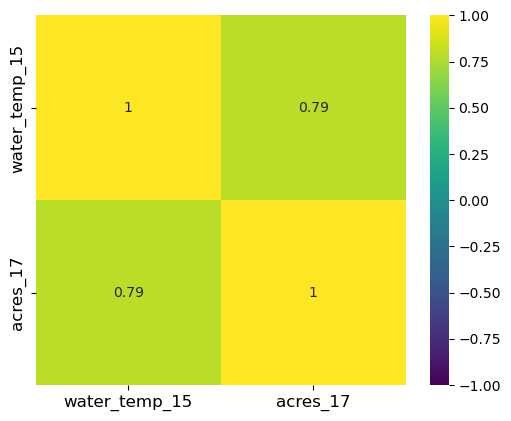

In [202]:
predictor_variables = ['water_temp_15']

numerical_predictors = merged_inner[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = merged_inner[numerical_predictors + ["acres_17"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

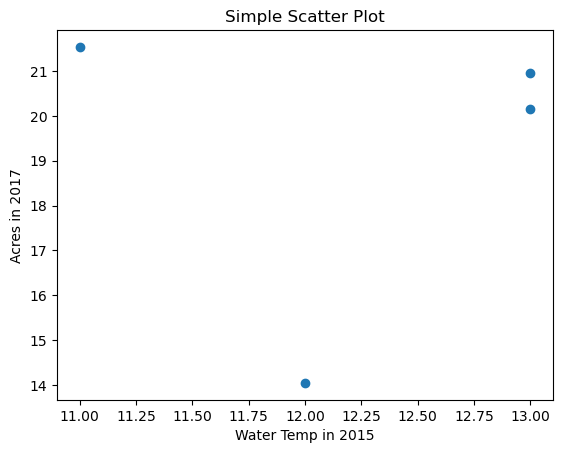

In [205]:
plt.scatter(ebey15['water_temp_15'], ebey17['acres_17'])

# Add labels and title
plt.xlabel("Water Temp in 2015")
plt.ylabel("Acres in 2017")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

## Figure out how to  impute

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
imputer = IterativeImputer()

In [ ]:
predictor_variables = [
    'water_temp_15',
    'water_temp_17'
]

In [ ]:
numerical_predictors = result[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

In [ ]:
imputer.fit(result.loc[:, numerical_predictors])

In [ ]:
result.loc[:, numerical_predictors] = imputer.transform(result.loc[:, numerical_predictors])

In [ ]:
result

In [ ]:
result.isna().sum().to_frame(name='Number of Missing Values')

In [ ]:
result= result.fillna(0)

In [ ]:
result.columns

In [ ]:
# Calculate the absolute difference in height
result['exp_diff'] = result['acres_17'] - result['acres_15']

# Calculate the percentage change
result['exp_pct'] = (result['acres_17'] / result['acres_15']) * 100

In [ ]:
result

In [ ]:
result[['exp_diff', 'exp_pct']].describe()

In [ ]:
predictor_variables = ['water_temp_17', 'water_temp_15']

numerical_predictors = result[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = result[numerical_predictors + ["exp_pct"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

scatterplots
temp vs two years later

In [ ]:
plt.scatter(result['acres_15'], result['water_temp_15'])

# Add labels and title for clarity
plt.xlabel('Water Temp')
plt.ylabel('Acres')
plt.title('Basic Scatter Plot')

# Display the plot
plt.show()

In [ ]:
plt.scatter(result['acres_17'], result['water_temp_17'])

# Add labels and title for clarity
plt.xlabel('Water Temp')
plt.ylabel('Acres')
plt.title('Basic Scatter Plot')

# Display the plot
plt.show()

In [ ]:
predictor_variables = ['water_temp_15']

numerical_predictors = result[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = result[numerical_predictors + ["acres_15"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()